In [ ]:
import pandas as pd 
import numpy as np 
from utils import preprocess, visualization
import plotly.express as px
import plotly.graph_objects as go
import wordcloud
from mlxtend.frequent_patterns import apriori, association_rules
from gensim.models import Word2Vec
import re
pd.set_option("display.max_columns", None)

In [2]:
## LOAD DATA 

path = r'data\Glintsdata_221111_Vietnam.csv'
# path = 'PATH_TO_DATAFILE'
df = pd.read_csv(path)

# Apply the function to preprocess the data
df[['salary_period', 'currency', 'lowerbound', 'upperbound', 'average']] = df['salary'].apply(preprocess.process_salary)
df = preprocess.standardize_salary_from_file("exchange_rate.json", df)

# Filter the wanted column only
col_to_keep = ['job_title', 'company_name', 'salary',
       'currency', 'salary_period',
       'lowerbound', 'upperbound', 'average', 'standardize_salary_VND',
       'category', 'contract', 'experience', 'requirement', 
       'industry', 'company_size', 
       'company_location','job_location']
eda_df = df[col_to_keep]

# Display df
display(eda_df.head())

,job_title,company_name,salary,currency,salary_period,lowerbound,upperbound,average,standardize_salary_VND,category,contract,experience,requirement,industry,company_size,company_location,job_location
0,[Glints 5 Ngày] Data Engineer,"Bbv Vietnam Co., Ltd",VND40.000.000/month,VND,month,40000000.0,40000000.0,40000000.0,40000000.0,Software Engineering,Việc làm fulltime,3 - 5 năm kinh nghiệm,"Interpersonal Skills,English,Analyzing skills,...",NaN,NaN,NaN,Ho Chi Minh City
1,[Glints 5 Ngày] Head Of Product,Be Group,USD7.000 - 10.000/month,USD,month,7000.0,10000.0,8500.0,215900432.0,Product Management,Việc làm fulltime,5 - 10 năm kinh nghiệm,"English,Strong Leadership Skills,Product Devel...",NaN,201-500 nhân viên,"Địa chỉ văn phòngTầng 16, Tòa Nhà Sai Gon Towe...",Ho Chi Minh City
2,[Glints 5 Ngày] Backend Developer,Poc Pharma,USD1.000 - 4.000/month,USD,month,1000.0,4000.0,2500.0,63500127.0,Software Engineering,Việc làm fulltime,3 - 5 năm kinh nghiệm,"Backend Developer,Data Structures,Critical Thi...",Pharmaceuticals,51-200 nhân viên,"Địa chỉ văn phòng 50 Tôn Thất Đạm, Phường Nguy...",Ho Chi Minh City
3,[Glints 5 Ngày] Senior/Lead Backend Engineer,Elfie,USD3.500 - 5.500/month,USD,month,3500.0,5500.0,4500.0,114300229.0,Software Engineering,Việc làm fulltime,5 - 10 năm kinh nghiệm,"Nosql,Data Modeling,Cloud Infrastructure,nodej...",NaN,11-50 nhân viên,"Địa chỉ văn phòngTầng 2, 124 Điện Biên Phủ, Ph...",Ho Chi Minh City
4,[Glints 5 Ngày] Head of Sales,John Hu Migration Consulting Viet Nam,USD4.000/month,USD,month,4000.0,4000.0,4000.0,101600203.0,Business Development / Sales,Việc làm fulltime,Hơn 10 năm kinh nghiệm,"English,Financial Literacy,Stakeholder Managem...",NaN,11-50 nhân viên,NaN,Ho Chi Minh City


In [3]:
df_data = preprocess.filter_job_titles(eda_df, keywords=["data", "business intelligence"])
lst = visualization.create_charts(df_data)


In [4]:
df_data = preprocess.filter_job_titles(eda_df, keywords=["data", "business intelligence"])
visualization.create_comparative_charts(df_data)

In [5]:
from utils import visualization
visualization.create_grouped_charts_in_batches(df_data, group_by="experience", 
                                 analysis_columns=["standardize_salary_VND", "requirement", "job_location"], 
                                 max_skills=20, max_rows=5)



In [6]:
from utils import visualization
visualization.create_grouped_charts_in_batches(df_data, group_by="job_location", 
                                 analysis_columns=["standardize_salary_VND", "requirement", "experience"], 
                                 max_skills=20, max_rows=5)



In [7]:

# Sử dụng hàm
scatter_3d_fig = visualization.create_scatter_3d(
    df=df_data,
    x_col="standardize_salary_VND",
    y_col="experience",
    z_col="job_location",
    color_col="job_location"
)

# Hiển thị biểu đồ
scatter_3d_fig.show()


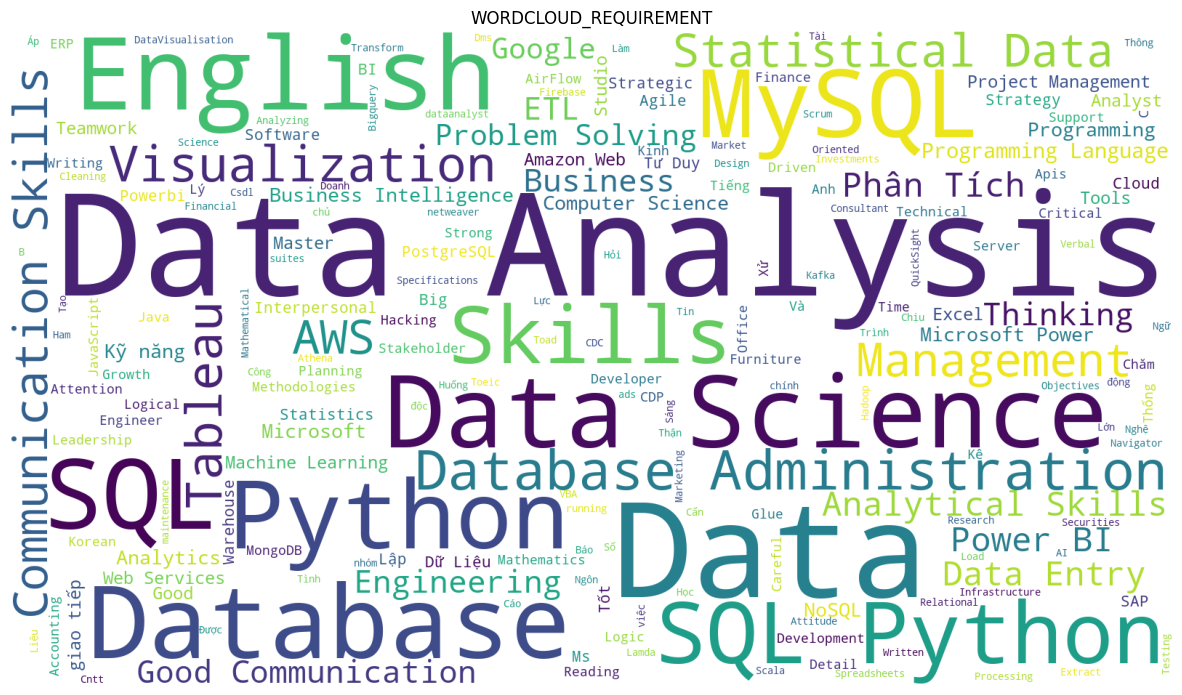

In [12]:
from utils import visualization
visualization.generate_wordcloud(df_data, column="requirement", title="WORDCLOUD_REQUIREMENT")